In [1]:
from pathlib import Path
import os


# Establece los directorios de trabajo
current_path = "."
try:
    current_path = os.getcwd()
except:
    pass

maps_path = Path(current_path).parent.as_posix()

print(f"{current_path=}")
print(f"{maps_path=}")

current_path='/home/rainmaker/Documents/MINISTERIO/GITLAB/mapas_habitab/utils'
maps_path='/home/rainmaker/Documents/MINISTERIO/GITLAB/mapas_habitab'


In [2]:
import re


# Filtra archivos de partido por sección electoral.
json_files = sorted([file for file in os.listdir(maps_path) if re.match(r"^B\d_.*.json$", file)])

print(json_files)

['B1_Buenos_Aires_seccion_electoral_primera.json', 'B2_Buenos_Aires_seccion_electoral_segunda.json', 'B3_Buenos_Aires_seccion_electoral_tercera.json', 'B4_Buenos_Aires_seccion_electoral_cuarta.json', 'B5_Buenos_Aires_seccion_electoral_quinta.json', 'B6_Buenos_Aires_seccion_electoral_sexta.json', 'B7_Buenos_Aires_seccion_electoral_septima.json', 'B8_Buenos_Aires_seccion_electoral_octava.json']


/home/rainmaker/.cache/pypoetry/virtualenvs/maps-7UvcWBLF-py3.8/lib/python3.8/site-packages/pandas/core/dtypes/cast.py:1784: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values


<Axes: >

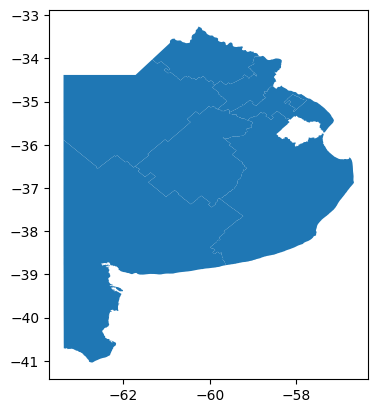

In [3]:
import geopandas
import pandas


# Extrae nombres de atributos comunes en todos los mapas.
columns = geopandas.read_file(os.path.join(maps_path, json_files[0]), rows=0).columns
# Genera GeoDataFrame en blanco.
gdf = geopandas.GeoDataFrame(columns=columns, geometry="geometry", crs="EPSG:4326")
# Itera cada archivo de sección electoral.
for file in json_files:
    # Extrae el nombre de la sección del nombre del archivo.
    seccion = re.search(r"(?<=_seccion_electoral_)\w+(?=.json)", file).group(0).upper()
    # Une todos los polígonos de cada sección.
    geometry = None
    for g in geopandas.read_file(os.path.join(maps_path, file))["geometry"]:
        if geometry is None:
            geometry = g
            continue
        geometry = geometry.union(g)
    # Compone cada sección en un registro del DataFrame.
    gdf.loc[len(gdf)] = [
        # gid
        len(gdf),
        # objeto
        "Sección Electoral",
        # fna
        f"Sección Elecoral {seccion.title()}",
        # gna
        "Sección Electoral",
        # nam
        seccion,
        # in1
        seccion,
        # fdc
        "ARBA - Gerencia de Servicios Catastrales",
        # sag
        "IGN",
        # geometry
        geometry,
    ]
# Plotea el resultado    
gdf.plot()

In [4]:
# Exporta el resultado
results_filename = "E1_Buenos_Aires_todas_las_secciones_electorales.json"
# gdf.to_file(os.path.join(maps_path, results_filename), driver="GeoJSON", encoding="ascii")

In [5]:
import json

dd = json.loads(gdf.to_json())

dd.update({
    "name": "E1 - Secciones Electorales de Buenos Aires",
    "crs": {
        "type": "Secciones Electorales de Buenos Aires",
        "properties": {"name": "urn:ogc:def:crs:OGC:1.3:CRS84"},
    }
})

for feature in dd["features"]:
    feature.pop('id', None)
    
    feature["geometry"].update({
        "type": "MultiPolygon",
        "coordinates": [feature["geometry"]["coordinates"]]
    })

with open(os.path.join(maps_path, results_filename), 'w', encoding='utf-8') as json_file:
    json.dump(dd, json_file, ensure_ascii=True)

In [6]:
with open(os.path.join(maps_path, json_files[0]), "r") as reader:
    jj = json.load(reader)

In [7]:
len(jj["features"][0]["geometry"]["coordinates"][0][0])

765

In [11]:
len(dd["features"][0]["geometry"]["coordinates"][0][0])

6290

In [12]:
dd["features"][0]["geometry"]["coordinates"][0][0]

[[-58.479624297999976, -34.49510414699995],
 [-58.479585036999936, -34.49509700899995],
 [-58.47949580699998, -34.49509343999995],
 [-58.479435130999946, -34.49510414699995],
 [-58.479420853999954, -34.49515054699998],
 [-58.47939230099996, -34.495200514999965],
 [-58.47934590099993, -34.495211222999956],
 [-58.47930901899997, -34.495211222999956],
 [-58.47929950199995, -34.495211222999956],
 [-58.47925310199997, -34.49522906899995],
 [-58.47921740999993, -34.49522192999996],
 [-58.47918171799995, -34.49521836099996],
 [-58.479131749999965, -34.49524691499994],
 [-58.479088918999935, -34.49525762199994],
 [-58.47903895099995, -34.49526119199993],
 [-58.478946151999935, -34.49526476099993],
 [-58.47887833699997, -34.49525405299994],
 [-58.478831937999985, -34.49523977599995],
 [-58.47875698499996, -34.49523977599995],
 [-58.47869630799994, -34.49526119199993],
 [-58.47866061599996, -34.49531829899996],
 [-58.47862849399996, -34.495353990999945],
 [-58.47858209399993, -34.49541109799998]

In [14]:
jj["features"][0]["geometry"]["coordinates"][0][0] = dd["features"][0]["geometry"]["coordinates"][0][0]